<div class="alert alert-block alert-danger">

# Data Processing

Environment: Python 3.9

<div class="alert alert-block alert-info">
    
# Table of Contents

</div>

[2. Data Processing](#1) <br>
$\;\;\;\;$[2.1. Import Libraries](#11) <br>
$\;\;\;\;$[2.2. Data Wrangling](#12) <br>

<div class="alert alert-block alert-success">
    
## Import Libraries <a class="anchor" name="11"></a>

Import libraries needed

In [1]:
import pandas as pd
import numpy as np
from convokit import Corpus, Utterance, Speaker
from nltk.tokenize import sent_tokenize
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

In [2]:
# Load the CSV file
df = pd.read_csv('data/stanfordMOOCForumPostsSet/posts.csv')

<div class="alert alert-block alert-success">
    
## Data Wrangling <a class="anchor" name="12"></a>

<div class="alert alert-block alert-success">
    
### Drop NA value <a class="anchor" name="121"></a>

In [3]:
# Drop rows where 'forum_uid' is null
df = df.dropna(subset=['forum_uid'])

<div class="alert alert-block alert-success">
    
### Fill Missing Value <a class="anchor" name="122"></a>

In [4]:
# Fill missing CourseType
# Function to extract the value before the first '/' from 'course_display_name'
def extract_course_type(course_display_name):
    if pd.notnull(course_display_name):  # Check if course_display_name is not null
        return course_display_name.split('/')[0]  # Split and take the first part
    return None

# Apply the function to fill null values in 'CourseType' with the extracted value from 'course_display_name'
df['CourseType'] = df.apply(lambda row: extract_course_type(row['course_display_name']) if pd.isnull(row['CourseType']) else row['CourseType'], axis=1)

In [5]:
# Fill 'comment_thread_id' with 'forum_post_id' where 'comment_thread_id' is null and 'post_type' is 'CommentThread'
df.loc[(df['comment_thread_id'].isnull()) & (df['post_type'] == 'CommentThread'), 'comment_thread_id'] = df['forum_post_id']

<div class="alert alert-block alert-success">
    
### Convert the format <a class="anchor" name="123"></a>

In [6]:
# Convert the four columns to integer
df['anonymous'] = df['anonymous'].fillna(0).astype(int)
df['anonymous_to_peers'] = df['anonymous_to_peers'].fillna(0).astype(int)
df['up_count'] = df['up_count'].fillna(0).astype(int)
df['reads'] = df['reads'].fillna(0).astype(int)

In [7]:
# Optionally save the cleaned DataFrame to a new file
df.to_csv('data/stanfordMOOCForumPostsSet/cleaned_posts.csv', index=False)

<div class="alert alert-block alert-success">
    
## Data Exploration <a class="anchor" name="13"></a>

In [8]:
df.dtypes

Text                         object
Opinion(1/0)                  int64
Question(1/0)                 int64
Answer(1/0)                   int64
Sentiment(1-7)              float64
Confusion(1-7)              float64
Urgency(1-7)                float64
CourseType                   object
forum_post_id                object
course_display_name          object
forum_uid                    object
created_at                   object
post_type                    object
anonymous                     int64
anonymous_to_peers            int64
up_count                      int64
comment_thread_id            object
reads                         int64
politeness_score            float64
unique_id                     int64
sum_svm_politeness_score      int64
Please                        int64
Please_start                  int64
HASHEDGE                      int64
Indirect_(btw)                int64
Hedges                        int64
Factuality                    int64
Deference                   

In [9]:
# Iterate over each column to show specific information based on data type
for column in df.columns:
    print(f"\nColumn: {column}")
    if pd.api.types.is_numeric_dtype(df[column]):
        # If the column is numeric, show the range (min, max)
        print(f"Numeric Column. Range: {df[column].min()} to {df[column].max()}")
    elif pd.api.types.is_categorical_dtype(df[column]) or pd.api.types.is_object_dtype(df[column]):
        # If the column is categorical or object (string), show unique values
        print(f"Categorical Column. Unique values: {df[column].unique()}")
    else:
        print("Other data type.")


Column: Text
Categorical Column. Unique values: ['Interesting! How often we say those things to others without really understanding what we are saying. That must have been a powerful experience! Excellent!'
 'What is \\Algebra as a Math Game\\" or are you just saying you create games that incorporate algebra."'
 'I like the idea of my kids principal who says \\Smart doesn\'t mean easy, smart means working hard\\" and incorporating the idea of making mistakes into working hard."'
 ...
 '> Hello Josh,_x0007__x0007_Is this hypothesis formulation correct?_x0007__x0007_HO: Breast feeding is related to obesity_x0007_H1: Breast feeding is not related to obesity_x0007__x0007_I think I am almost there!_x0007__x0007_Best Wishes,_x0007__x0007_<nameRedac_<anon_screen_name_redacted>>'
 "Hi Josh,_x0007__x0007__x0007__x0007_Looking at the table for this question, I see that the first number in the second column is 130. how can this be if we're talking percentages? I know it doesn't matter to answer 

<div class="alert alert-block alert-success">
    
## Descriptive Statistics <a class="anchor" name="14"></a>

In [10]:
# Load the CSV file again
df = pd.read_csv('data/stanfordMOOCForumPostsSet/cleaned_posts.csv')

In [11]:
df

,Text,Opinion(1/0),Question(1/0),Answer(1/0),Sentiment(1-7),Confusion(1-7),Urgency(1-7),CourseType,forum_post_id,course_display_name,...,1st_person_start,2nd_person,2nd_person_start,Indirect_(greeting),Direct_question,Direct_start,HASPOSITIVE,HASNEGATIVE,SUBJUNCTIVE,INDICATIVE
0,Interesting! How often we say those things to ...,1,0,0,6.5,2.0,1.5,Education,5225177f2c501f0a00000015,Education/EDUC115N/How_to_Learn_Math,...,0,0,0,0,1,0,3,0,0,0
1,"What is \Algebra as a Math Game\"" or are you j...",0,1,0,4.0,5.0,3.5,Education,5207d0e9935dfc0e0000005e,Education/EDUC115N/How_to_Learn_Math,...,0,1,0,0,1,0,0,0,0,0
2,I like the idea of my kids principal who says ...,1,0,0,5.5,3.0,2.5,Education,52052c82d01fec0a00000071,Education/EDUC115N/How_to_Learn_Math,...,1,0,0,0,0,0,1,1,0,0
3,"From their responses, it seems the students re...",1,0,0,6.0,3.0,2.5,Education,5240a45e067ebf1200000008,Education/EDUC115N/How_to_Learn_Math,...,0,0,0,0,0,0,2,0,0,0
4,"The boys loved math, because \there is freedom...",1,0,0,7.0,2.0,3.0,Education,5212c5e2dd10251500000062,Education/EDUC115N/How_to_Learn_Math,...,1,2,1,0,0,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29580,The p value tells us the probability of observ...,0,0,1,4.0,3.5,2.0,Medicine,53e44042bf0e2c074e000039,Medicine/MedStats/Summer2014,...,0,0,0,0,0,0,0,0,0,0
29581,given the null hypothesis is considered true,0,0,1,4.0,3.5,1.0,Medicine,53e442dfbf0e2c8d66000034,Medicine/MedStats/Summer2014,...,0,0,0,0,0,0,0,0,0,0
29582,"> Hello Josh,_x0007__x0007_Is this hypothesis ...",0,1,0,4.0,5.0,5.5,Medicine,53e447cbbce97d56a9000032,Medicine/MedStats/Summer2014,...,0,0,0,0,0,0,0,0,0,0
29583,"Hi Josh,_x0007__x0007__x0007__x0007_Looking at...",0,1,0,3.5,5.0,5.5,Medicine,53e46e1cbce97d5d4300003c,Medicine/MedStats/Summer2014,...,1,0,0,1,1,0,0,1,0,0


In [12]:
# Convert the DataFrame to a ConvoKit Corpus using unique_id and forum_uid
def create_corpus_from_df(df, speaker_column, text_column, post_type_column):
    """
    Create a ConvoKit corpus from a dataframe, splitting text into individual utterances (sentences).
    """
    utterances = []
    for i, row in df.iterrows():
        speaker_id = row[speaker_column]
        post_type = row[post_type_column]
        text = row[text_column]

        if isinstance(text, str):  # Ensure the text is valid
            sentences = sent_tokenize(text)  # Split the text into sentences
            for j, sentence in enumerate(sentences):
                utterance = Utterance(
                    id=f"{i}_{j}", 
                    speaker=Speaker(id=speaker_id), 
                    text=sentence,
                    meta={'post_type': post_type}  # Storing post type in metadata
                )
                utterances.append(utterance)

    return Corpus(utterances=utterances)

# Filter rows where post_type is CommentThread
df_comment_thread = df[df['post_type'] == 'CommentThread']
# Filter rows where post_type is Comment
df_comment = df[df['post_type'] == 'Comment']

# Create corpora
corpus_all = create_corpus_from_df(df, speaker_column="forum_uid", text_column="Text", post_type_column="post_type")
corpus_comment_thread = create_corpus_from_df(df[df["post_type"] == "CommentThread"], speaker_column="forum_uid", text_column="Text", post_type_column="post_type")
corpus_comment = create_corpus_from_df(df[df["post_type"] == "Comment"], speaker_column="forum_uid", text_column="Text", post_type_column="post_type")

# Define function to calculate the number of posts
def num_posts(df):
    return len(df)
    
# Count number of utterances in the corpus
def num_utterances(corpus):
    return len(list(corpus.iter_utterances()))

# Count unique forum_uid
def num_unique_users(df):
    return df['forum_uid'].nunique()

# Add additional statistics for the Opinion, Question, Answer, and anonymous columns
def sum_column(df, column_name):
    """Helper function to sum values of a specific column."""
    return df[column_name].sum()

In [25]:
# Initialize the column structure with a single level
columns = ['All', 'Comment Thread', 'Comment']

# Initialize the descriptive statistics table with single-level columns
descriptive_stats = pd.DataFrame(columns=columns)

# Function to populate the statistics
def populate_stats(df):
    # Filter for post types
    df_thread = df[df['post_type'] == 'CommentThread']
    df_comment = df[df['post_type'] == 'Comment']
    
    # Create corpora for CommentThread and Comment
    corpus_thread = create_corpus_from_df(df_thread, speaker_column="forum_uid", text_column="Text", post_type_column="post_type")
    corpus_comment = create_corpus_from_df(df_comment, speaker_column="forum_uid", text_column="Text", post_type_column="post_type")
    
    # Populate the statistics for All, Comment Thread, and Comment
    descriptive_stats.loc['1. # Total Posts', 'All'] = num_posts(df)
    descriptive_stats.loc['1. # Total Posts', 'Comment Thread'] = num_posts(df_thread)
    descriptive_stats.loc['1. # Total Posts', 'Comment'] = num_posts(df_comment)
    
    descriptive_stats.loc['2. # Total Utterances', 'All'] = num_utterances(create_corpus_from_df(df, "forum_uid", "Text", "post_type"))
    descriptive_stats.loc['2. # Total Utterances', 'Comment Thread'] = num_utterances(corpus_thread)
    descriptive_stats.loc['2. # Total Utterances', 'Comment'] = num_utterances(corpus_comment)
    
    descriptive_stats.loc['3. # Total Users', 'All'] = num_unique_users(df)
    descriptive_stats.loc['3. # Total Users', 'Comment Thread'] = num_unique_users(df_thread)
    descriptive_stats.loc['3. # Total Users', 'Comment'] = num_unique_users(df_comment)

# Populate the statistics for 'All'
populate_stats(df)

# Function to populate sum columns
def populate_sum_columns(df):
    # Filter for post types
    df_thread = df[df['post_type'] == 'CommentThread']
    df_comment = df[df['post_type'] == 'Comment']

    # Populate Opinion(1/0) column
    descriptive_stats.loc['4. # Post With Opinion', 'All'] = sum_column(df, 'Opinion(1/0)')
    descriptive_stats.loc['4. # Post With Opinion', 'Comment Thread'] = sum_column(df_thread, 'Opinion(1/0)')
    descriptive_stats.loc['4. # Post With Opinion', 'Comment'] = sum_column(df_comment, 'Opinion(1/0)')
    
    # Populate Question(1/0) column
    descriptive_stats.loc['5. # Post With Question', 'All'] = sum_column(df, 'Question(1/0)')
    descriptive_stats.loc['5. # Post With Question', 'Comment Thread'] = sum_column(df_thread, 'Question(1/0)')
    descriptive_stats.loc['5. # Post With Question', 'Comment'] = sum_column(df_comment, 'Question(1/0)')
    
    # Populate Answer(1/0) column
    descriptive_stats.loc['6. # Post With Answer', 'All'] = sum_column(df, 'Answer(1/0)')
    descriptive_stats.loc['6. # Post With Answer', 'Comment Thread'] = sum_column(df_thread, 'Answer(1/0)')
    descriptive_stats.loc['6. # Post With Answer', 'Comment'] = sum_column(df_comment, 'Answer(1/0)')
    
    # Populate anonymous column
    descriptive_stats.loc['7. # Anonymised Post', 'All'] = sum_column(df, 'anonymous')
    descriptive_stats.loc['7. # Anonymised Post', 'Comment Thread'] = sum_column(df_thread, 'anonymous')
    descriptive_stats.loc['7. # Anonymised Post', 'Comment'] = sum_column(df_comment, 'anonymous')

# Populate the sum columns
populate_sum_columns(df)

def populate_average_columns(df, course_type=None):
    if course_type:
        df_all = df[df['CourseType'] == course_type]
        df_thread = df_all[df_all['post_type'] == 'CommentThread']
        df_comment = df_all[df_all['post_type'] == 'Comment']
    else:
        df_all = df
        df_thread = df[df['post_type'] == 'CommentThread']
        df_comment = df[df['post_type'] == 'Comment']

    # Helper function to calculate mean ± SD
    def mean_sd(series):
        return f"{series.mean():.2f} ± {series.std():.2f}"
    
    # Populate Sentiment(1-7) column
    descriptive_stats.loc['8. Avg. Sentiment/Post', 'All'] = mean_sd(df['Sentiment(1-7)'])
    descriptive_stats.loc['8. Avg. Sentiment/Post', 'Comment Thread'] = mean_sd(df_thread['Sentiment(1-7)'])
    descriptive_stats.loc['8. Avg. Sentiment/Post', 'Comment'] = mean_sd(df_comment['Sentiment(1-7)'])

    # Populate Confusion(1-7) column
    descriptive_stats.loc['9. Avg. Confusion/Post', 'All'] = mean_sd(df['Confusion(1-7)'])
    descriptive_stats.loc['9. Avg. Confusion/Post', 'Comment Thread'] = mean_sd(df_thread['Confusion(1-7)'])
    descriptive_stats.loc['9. Avg. Confusion/Post', 'Comment'] = mean_sd(df_comment['Confusion(1-7)'])

    # Populate Urgency(1-7) column
    descriptive_stats.loc['10. Avg. Urgency/Post', 'All'] = mean_sd(df['Urgency(1-7)'])
    descriptive_stats.loc['10. Avg. Urgency/Post', 'Comment Thread'] = mean_sd(df_thread['Urgency(1-7)'])
    descriptive_stats.loc['10. Avg. Urgency/Post', 'Comment'] = mean_sd(df_comment['Urgency(1-7)'])

# Populate averages for all posts
populate_average_columns(df)

# Add average utterances per post and average words per post with mean ± SD
# Function to calculate the average number of utterances and words per post with mean ± SD
def populate_additional_averages(df):
    df_thread = df[df['post_type'] == 'CommentThread']
    df_comment = df[df['post_type'] == 'Comment']
    
    # Helper function to calculate average utterances per post with mean ± SD
    def avg_utterances_per_post(corpus, total_posts):
        utterance_counts = [len(list(utterance.text.split('.'))) for utterance in corpus.iter_utterances()]
        mean_utterances = np.mean(utterance_counts) if utterance_counts else 0
        std_utterances = np.std(utterance_counts) if utterance_counts else 0
        return f"{mean_utterances:.2f} ± {std_utterances:.2f}"

    # Helper function to calculate average words per post with mean ± SD
    def avg_words_per_post(df):
        word_counts = df['Text'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)
        mean_words = word_counts.mean()
        std_words = word_counts.std()
        return f"{mean_words:.2f} ± {std_words:.2f}"

    # Average utterances per post with mean ± SD
    descriptive_stats.loc['11. Avg. Utterances/Post', 'All'] = avg_utterances_per_post(corpus_all, num_posts(df))
    descriptive_stats.loc['11. Avg. Utterances/Post', 'Comment Thread'] = avg_utterances_per_post(corpus_comment_thread, num_posts(df_thread))
    descriptive_stats.loc['11. Avg. Utterances/Post', 'Comment'] = avg_utterances_per_post(corpus_comment, num_posts(df_comment))
    
    # Average words per post with mean ± SD
    descriptive_stats.loc['12. Avg. Words/Post', 'All'] = avg_words_per_post(df)
    descriptive_stats.loc['12. Avg. Words/Post', 'Comment Thread'] = avg_words_per_post(df_thread)
    descriptive_stats.loc['12. Avg. Words/Post', 'Comment'] = avg_words_per_post(df_comment)

# Populate additional averages with mean ± SD
populate_additional_averages(df)

In [26]:
# Styling for the table
styled_table = (
    descriptive_stats.style
    .set_properties(**{
        'text-align': 'left',  # Left-align the values
        'border': '1px solid black',  # Add borders for clarity
        'padding': '8px'  # Padding for better spacing
    })
    .set_table_styles({
        # Apply a bottom border to each column header
        'All': [{'selector': 'th.col_heading.level0', 'props': [('border-bottom', '2px solid black')]}],
        'Comment Thread': [{'selector': 'th.col_heading.level0', 'props': [('border-bottom', '2px solid black')]}],
        'Comment': [{'selector': 'th.col_heading.level0', 'props': [('border-bottom', '2px solid black')]}],
    }, overwrite=False)
)

# Display the styled table
styled_table

,All,Comment Thread,Comment
1. # Total Posts,29585,12287,17298
2. # Total Utterances,97512,48289,49223
3. # Total Users,11042,7247,6565
4. # Post With Opinion,16463,8497,7966
5. # Post With Question,5957,3377,2580
6. # Post With Answer,6044,528,5516
7. # Anonymised Post,512,512,0
8. Avg. Sentiment/Post,4.18 ± 0.69,4.18 ± 0.75,4.18 ± 0.64
9. Avg. Confusion/Post,3.91 ± 0.61,3.92 ± 0.71,3.90 ± 0.52
10. Avg. Urgency/Post,2.74 ± 1.40,3.14 ± 1.39,2.45 ± 1.33


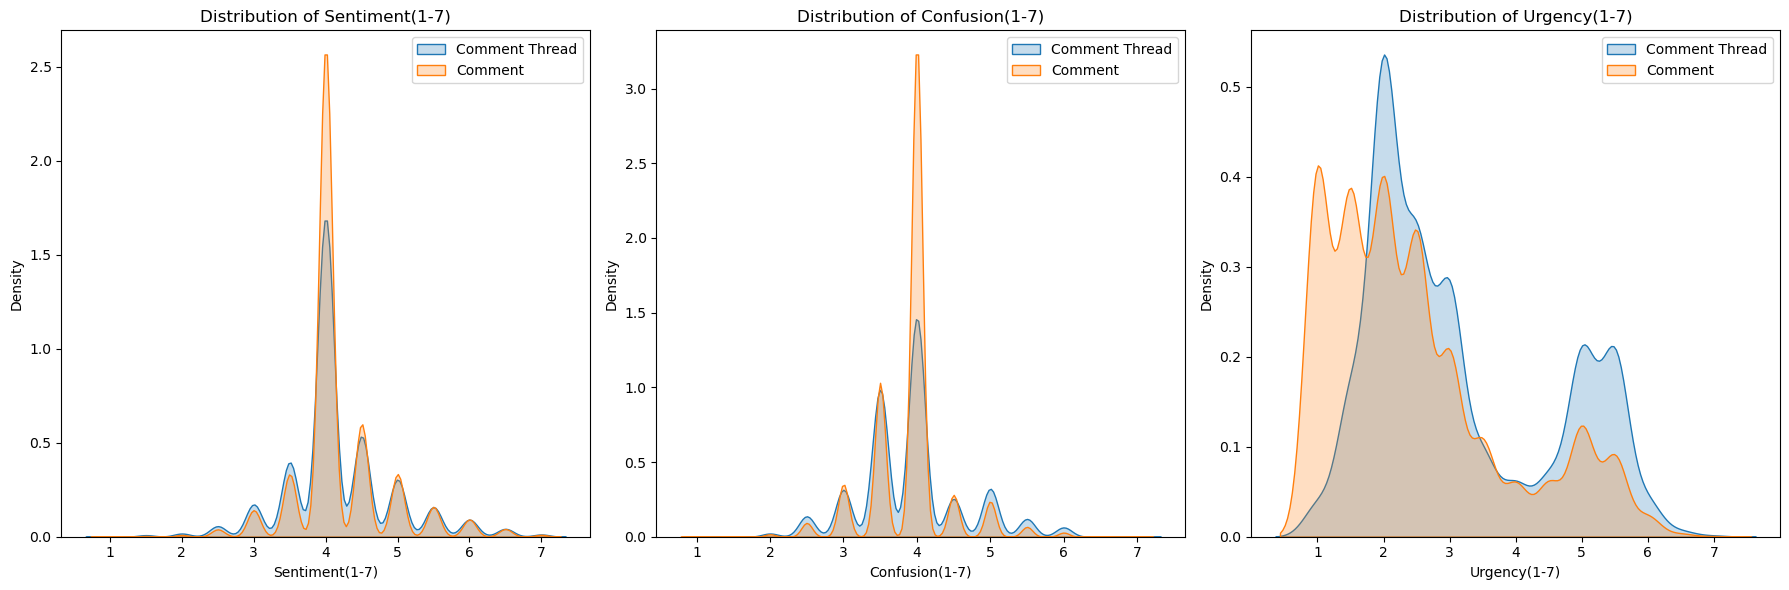

In [15]:
# Function to plot the distributions in one row
def plot_distributions(df, columns):
    df_thread = df[df['post_type'] == 'CommentThread']
    df_comment = df[df['post_type'] == 'Comment']
    
    # Create subplots with 3 columns
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 3 plots horizontally
    
    # Iterate over the columns to create individual plots
    for i, column_name in enumerate(columns):
        sns.kdeplot(df_thread[column_name], label='Comment Thread', fill=True, ax=axes[i])
        sns.kdeplot(df_comment[column_name], label='Comment', fill=True, ax=axes[i])
        axes[i].set_title(f"Distribution of {column_name}")
        axes[i].set_xlabel(column_name)
        axes[i].legend()

    plt.tight_layout()  # Adjust spacing between plots
    plt.show()

# Plot the distributions for Sentiment, Confusion, and Urgency side by side
plot_distributions(df, ['Sentiment(1-7)', 'Confusion(1-7)', 'Urgency(1-7)'])

In [16]:
# Function to perform the Mann-Whitney U Test
def perform_mann_whitney(df, column_name):
    df_thread = df[df['post_type'] == 'CommentThread']
    df_comment = df[df['post_type'] == 'Comment']

    # Perform the Mann-Whitney U Test
    stat, p_value = mannwhitneyu(df_thread[column_name], df_comment[column_name], alternative='two-sided')
    print(f"Mann-Whitney U Test for {column_name}:")
    print(f"Statistic: {stat}, p-value: {p_value}")

# Perform the test for Sentiment, Confusion, and Urgency
perform_mann_whitney(df, 'Sentiment(1-7)')
perform_mann_whitney(df, 'Confusion(1-7)')
perform_mann_whitney(df, 'Urgency(1-7)')

Mann-Whitney U Test for Sentiment(1-7):
Statistic: 105518020.5, p-value: 0.25366917735783845
Mann-Whitney U Test for Confusion(1-7):
Statistic: 102267632.5, p-value: 1.83355821670986e-09
Mann-Whitney U Test for Urgency(1-7):
Statistic: 139045495.0, p-value: 0.0


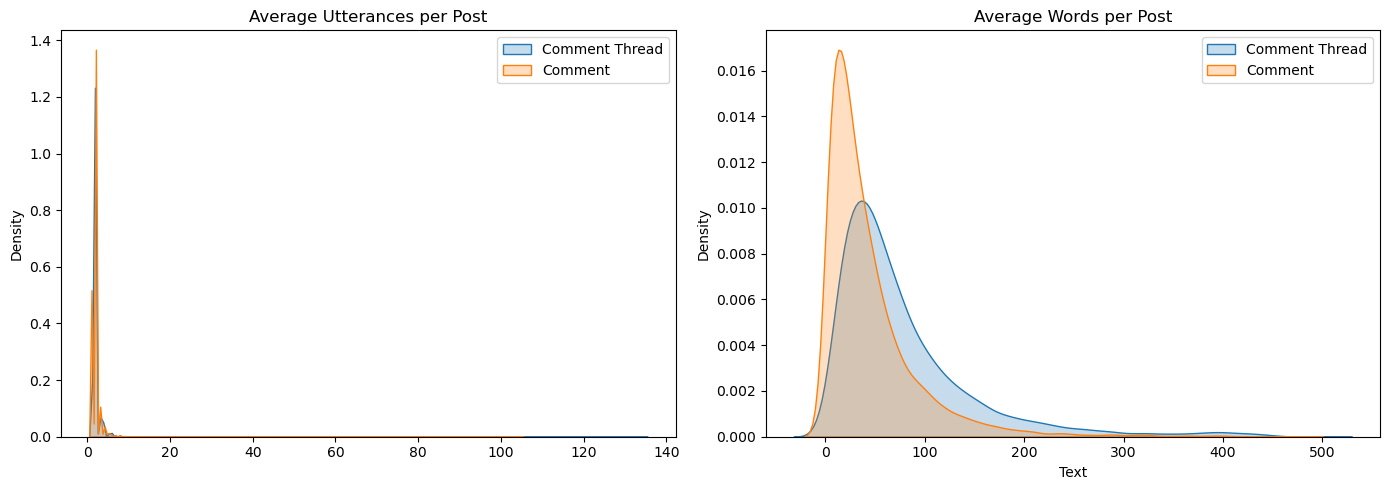

Mann-Whitney U Test for Average Utterances per Post:
Statistic: 1245243835.0, p-value: 6.241831221432568e-56

Mann-Whitney U Test for Average Words per Post:
Statistic: 147449032.5, p-value: 0.0


In [27]:
# Plot distributions and perform Mann-Whitney U Test

def plot_and_test_distributions(df):
    # Filter for CommentThread and Comment
    df_thread = df[df['post_type'] == 'CommentThread']
    df_comment = df[df['post_type'] == 'Comment']

    # Calculate utterances and words for each post type
    utterances_thread = [len(list(utterance.text.split('.'))) for utterance in corpus_comment_thread.iter_utterances()]
    utterances_comment = [len(list(utterance.text.split('.'))) for utterance in corpus_comment.iter_utterances()]

    words_thread = df_thread['Text'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)
    words_comment = df_comment['Text'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)

    # Set up the plot
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Plot Average Utterances per Post
    sns.kdeplot(utterances_thread, label='Comment Thread', fill=True, ax=axes[0])
    sns.kdeplot(utterances_comment, label='Comment', fill=True, ax=axes[0])
    axes[0].set_title('Average Utterances per Post')
    axes[0].legend()

    # Plot Average Words per Post
    sns.kdeplot(words_thread, label='Comment Thread', fill=True, ax=axes[1])
    sns.kdeplot(words_comment, label='Comment', fill=True, ax=axes[1])
    axes[1].set_title('Average Words per Post')
    axes[1].legend()

    plt.tight_layout()
    plt.show()

    # Perform Mann-Whitney U Test
    print("Mann-Whitney U Test for Average Utterances per Post:")
    u_statistic, p_value = mannwhitneyu(utterances_thread, utterances_comment, alternative='two-sided')
    print(f"Statistic: {u_statistic}, p-value: {p_value}")

    print("\nMann-Whitney U Test for Average Words per Post:")
    u_statistic, p_value = mannwhitneyu(words_thread, words_comment, alternative='two-sided')
    print(f"Statistic: {u_statistic}, p-value: {p_value}")

# Run the function to plot and test
plot_and_test_distributions(df)

<div class="alert alert-block alert-success">
    
## Politeness RQ1 <a class="anchor" name="15"></a>